In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
def create_knowledge_graph():
    # Створення графа
    G = nx.Graph()

    # Додавання вузлів (міст)
    cities = ["Kyiv", "Lviv", "Odessa", "Dnipro", "Kharkiv", "Vinnytsia"]
    G.add_nodes_from(cities)

    # Додавання ребер (маршрутів) з атрибутами
    routes = [
        ("Kyiv", "Lviv", {"distance": 540, "time": 6, "type": "highway"}),
        ("Kyiv", "Vinnytsia", {"distance": 270, "time": 3, "type": "regular road"}),
        ("Vinnytsia", "Lviv", {"distance": 370, "time": 4.5, "type": "regular road"}),
        ("Kyiv", "Odessa", {"distance": 475, "time": 5.5, "type": "highway"}),
        ("Odessa", "Dnipro", {"distance": 500, "time": 6, "type": "regular road"}),
        ("Dnipro", "Kharkiv", {"distance": 220, "time": 2.5, "type": "highway"}),
        ("Kyiv", "Kharkiv", {"distance": 480, "time": 5, "type": "highway"})
    ]

    G.add_edges_from(routes)
    return G

In [21]:
def find_shortest_path(graph, source, target):
    try:
        # Знаходження найкоротшого шляху за алгоритмом Дейкстри
        path = nx.dijkstra_path(graph, source=source, target=target, weight='distance')
        path_length = nx.dijkstra_path_length(graph, source=source, target=target, weight='distance')
        
        return {
            "route": path,
            "total_distance": path_length,
            "details": [
                {"from": path[i], "to": path[i+1], **graph[path[i]][path[i+1]]}
                for i in range(len(path) - 1)
            ]
        }
    except nx.NetworkXNoPath:
        return {"error": f"No path found between {source} and {target}."}
    except nx.NodeNotFound as e:
        return {"error": str(e)}

In [27]:
def analyze_graph(graph):
    # Аналіз центральності вузлів (betweenness_centrality)
    centrality = nx.betweenness_centrality(graph)
    most_important_city = max(centrality, key=centrality.get)

    # Знаходження найдовшого можливого шляху (діаметр графа)
    try:
        longest_path = max(nx.all_pairs_dijkstra_path_length(graph, weight='distance'), key=lambda x: max(x[1].values()))
        longest_distance = max(longest_path[1].values())
        longest_pair = (longest_path[0], max(longest_path[1], key=longest_path[1].get))
    except nx.NetworkXError:
        longest_pair, longest_distance = (None, None), 0

    return {
        "most_important_city": most_important_city,
        "centrality_score": centrality[most_important_city],
        "longest_path": longest_pair,
        "longest_distance": longest_distance
    }

# Аналіз графа
analysis = analyze_graph(G)
print("\nАналіз графа:")
print(f"Найважливіше місто за центральністю: {analysis['most_important_city']} (центральність: {analysis['centrality_score']:.4f})")
print(f"Найдовший можливий маршрут: {analysis['longest_path']} (відстань: {analysis['longest_distance']} км)")


Аналіз графа:
Найважливіше місто за центральністю: Kyiv (центральність: 0.6500)
Найдовший можливий маршрут: ('Lviv', 'Dnipro') (відстань: 1240 км)


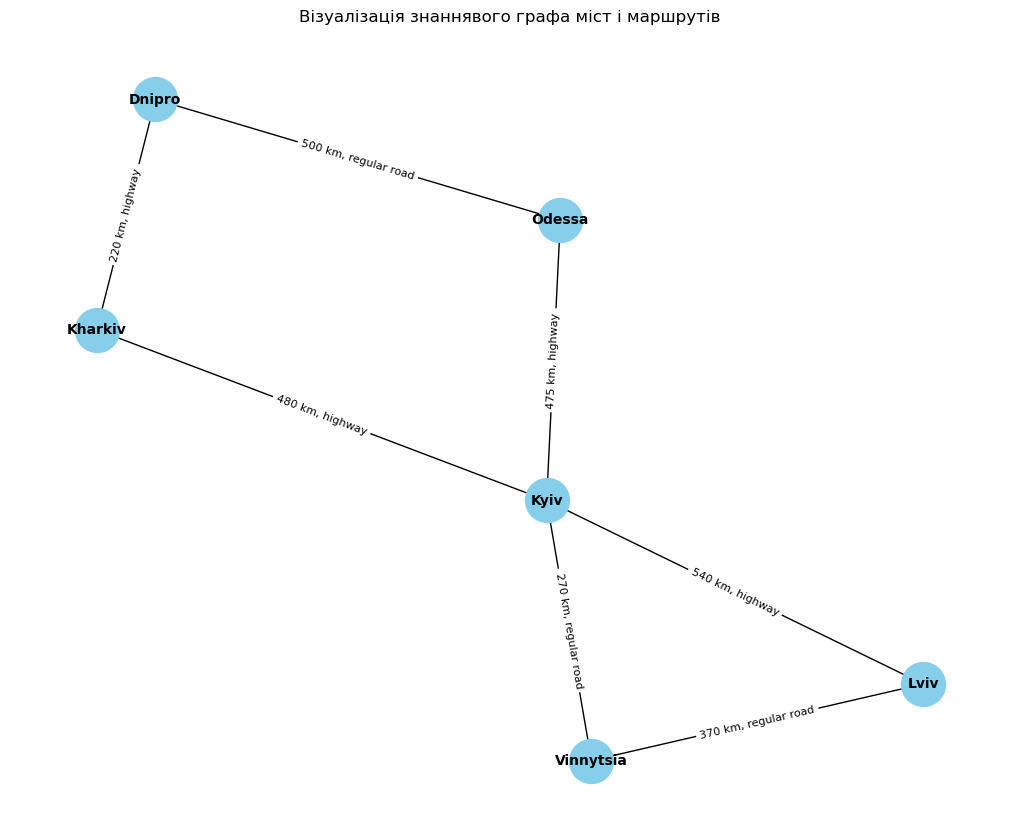


Інтерпретація результатів:
Найважливіше місто з точки зору транспортного управління — Kyiv. Це означає, що воно має високий вплив на потоки між іншими містами.
Найдовший можливий маршрут — між Lviv та Dnipro з відстанню 1240 км. Це дозволяє оцінити найдальші точки мережі для оптимізації логістики.


In [26]:
def visualize_graph(graph):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)  # Розташування вузлів графа

    # Візуалізація вузлів і ребер
    nx.draw(graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
    edge_labels = {(u, v): f"{d['distance']} km, {d['type']}" for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Візуалізація знаннявого графа міст і маршрутів")
    plt.show()

def interpret_results(analysis):
    print("\nІнтерпретація результатів:")
    print(f"Найважливіше місто з точки зору транспортного управління — {analysis['most_important_city']}. Це означає, що воно має високий вплив на потоки між іншими містами.")
    print(f"Найдовший можливий маршрут — між {analysis['longest_path'][0]} та {analysis['longest_path'][1]} з відстанню {analysis['longest_distance']} км. Це дозволяє оцінити найдальші точки мережі для оптимізації логістики.")

# Візуалізація графа
visualize_graph(G)

# Інтерпретація результатів
interpret_results(analysis)